In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
import astropy.units as u

from lsst.rsp import get_tap_service, retrieve_query

service = get_tap_service("ssotap")

In [70]:
df_mpcorb = service.search("SELECT ssObjectId,e,incl,mpcH,q FROM dp03_catalogs.MPCORB").to_table().to_pandas()

In [72]:
df_ssobj = service.search("SELECT ssObjectId,uH,gH,rH,iH,zH,yH FROM dp03_catalogs.SSObject").to_table().to_pandas()

In [68]:
#df_mpcorb2 = service.search("SELECT e,incl,mpcH,nobs,q FROM dp03_catalogs.MPCORB WHERE q/(1-e) < 5.5 AND \
#                             q/(1-e) > 1.0 AND e<1").to_table().to_pandas()

In [69]:
df_mpcorb

,e,incl,mpcH,nobs,q
0,0.012210,4.285390,11.940000,0,5.363310
1,0.015360,23.276730,13.830000,0,5.405740
2,0.020300,9.064150,12.960000,0,5.291260
3,0.000600,9.391210,16.719999,0,5.380060
4,0.024970,11.422600,11.240000,0,5.330720
...,...,...,...,...,...
14371858,0.263561,9.001042,22.075001,0,1.021507
14371859,0.375030,29.203448,22.075001,0,1.169876
14371860,0.214870,14.900356,22.075001,0,1.253201
14371861,0.406883,13.597687,22.075001,0,1.256916


q = a(1-e) ??? (a: semimajor axis, q: perihelion distance) -- known as "cometary coords"?

In [58]:
a = df_mpcorb.q/(1.0-df_mpcorb.e)

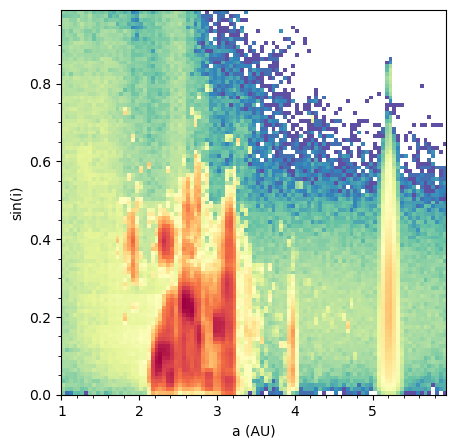

In [59]:
xedges0 = np.arange(1.0, 6.0, 0.05)
yedges0 = np.arange(0.0, 1.0, 0.01)

fig = plt.figure(figsize=(6, 5))

dens,xedges,yedges = np.histogram2d(a,
                                    np.sin(np.deg2rad(df_mpcorb.incl)),
                                    bins=(xedges0,yedges0))
dens = np.rot90(dens)

extent = [xedges0[0], xedges0[-1], yedges0[0], yedges0[-1]]
img=plt.imshow(dens, cmap='Spectral_r', extent=extent, norm='log', aspect=5)

#plt.colorbar()
plt.xlabel('a (AU)')
plt.ylabel('sin(i)')
plt.minorticks_on()
#plt.hexbin(df_mpcorb.e, np.sin(np.deg2rad(df_mpcorb.incl)), gridsize=200, norm='log') #, 'k.', alpha=0.05)
plt.show()

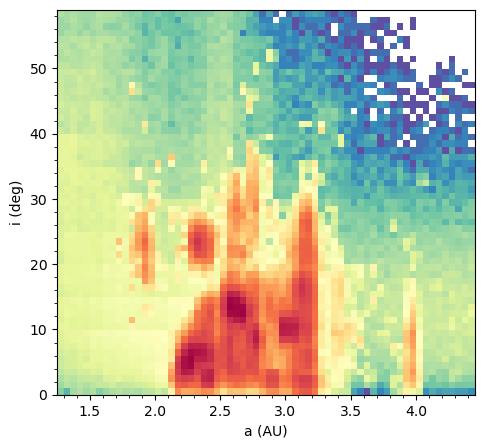

In [60]:
xedges0 = np.arange(1.25, 4.5, 0.05)
yedges0 = np.arange(0.0, 60.0, 1.0)

fig = plt.figure(figsize=(6, 5))

dens,xedges,yedges = np.histogram2d(a,
                                    df_mpcorb.incl,
                                    bins=(xedges0,yedges0))
dens = np.rot90(dens)

extent = [xedges0[0], xedges0[-1], yedges0[0], yedges0[-1]]
img=plt.imshow(dens, cmap='Spectral_r', extent=extent, norm='log', aspect=0.05)

#plt.colorbar()
plt.xlabel('a (AU)')
plt.ylabel('i (deg)')

plt.minorticks_on()
#plt.hexbin(df_mpcorb.e, np.sin(np.deg2rad(df_mpcorb.incl)), gridsize=200, norm='log') #, 'k.', alpha=0.05)
plt.show()

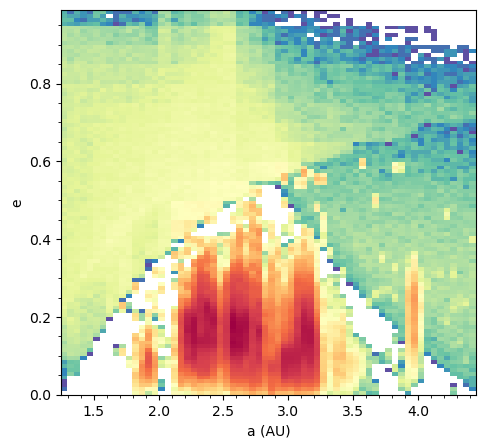

In [64]:
xedges0 = np.arange(1.25, 4.5, 0.05)
yedges0 = np.arange(0.0, 1.0, 0.01)

fig = plt.figure(figsize=(6, 5))

dens,xedges,yedges = np.histogram2d(a,
                                    df_mpcorb.e,
                                    bins=(xedges0,yedges0))
dens = np.rot90(dens)

extent = [xedges0[0], xedges0[-1], yedges0[0], yedges0[-1]]
img=plt.imshow(dens, cmap='Spectral_r', extent=extent, norm='log', aspect=3)

#plt.colorbar()
plt.xlabel('a (AU)')
plt.ylabel('e')

plt.minorticks_on()
#plt.hexbin(df_mpcorb.e, np.sin(np.deg2rad(df_mpcorb.incl)), gridsize=200, norm='log') #, 'k.', alpha=0.05)
plt.show()

In [75]:
# Join the tables:

allsrc_sel = df_mpcorb.set_index('ssObjectId').join(df_ssobj.set_index('ssObjectId'), on='ssObjectId', lsuffix='_1', rsuffix='_2', how='outer')

In [86]:
acolor = 0.89*(allsrc_sel.gH-allsrc_sel.rH) - 0.45*(allsrc_sel.rH-allsrc_sel.iH) - 0.57

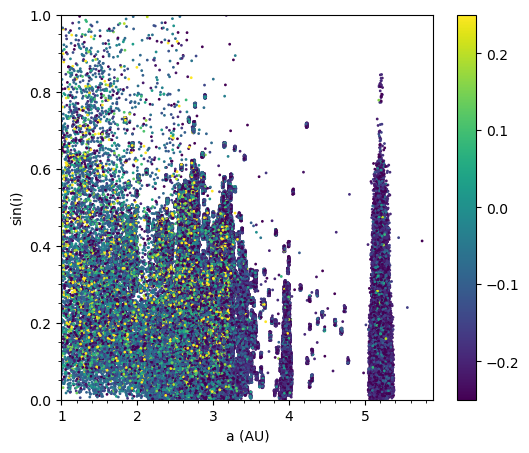

In [87]:
fig = plt.figure(figsize=(6, 5))

plt.scatter(a, np.sin(np.deg2rad(allsrc_sel.incl)), c=acolor, s=1, vmin=-0.25, vmax=0.25)
plt.colorbar()
plt.xlim(1, 5.9)
plt.ylim(0, 1)
plt.xlabel('a (AU)')
plt.ylabel('sin(i)')
plt.minorticks_on()
plt.show()
plt.close()

In [79]:
allsrc_sel.to_parquet('mpcorb_ssobj.parq')

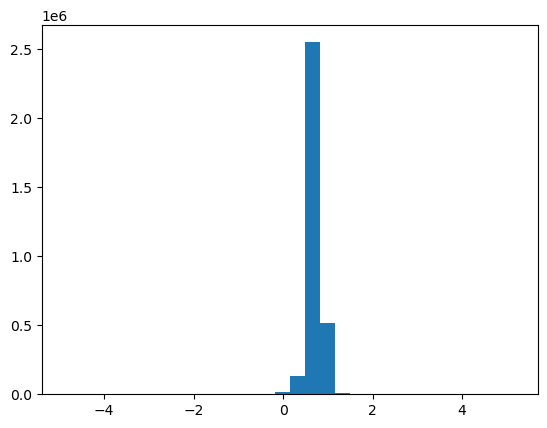

In [80]:
trojans = (a > 5) & (a < 6)
mb2to3 = 

plt.hist(allsrc_sel.gH-allsrc_sel.zH, bins=30)
plt.show()

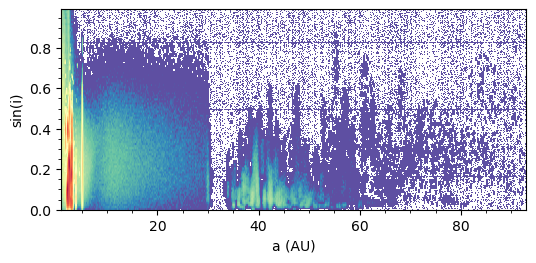

In [100]:
xedges0 = np.arange(1.0, 93.0, 0.05)
yedges0 = np.arange(0.0, 1.0, 0.01)

fig = plt.figure(figsize=(6, 5))

dens,xedges,yedges = np.histogram2d(a,
                                    np.sin(np.deg2rad(df_mpcorb.incl)),
                                    bins=(xedges0,yedges0))
dens = np.rot90(dens)

extent = [xedges0[0], xedges0[-1], yedges0[0], yedges0[-1]]
img=plt.imshow(dens, cmap='Spectral_r', extent=extent, norm='log', aspect=40)

#plt.colorbar()
plt.xlabel('a (AU)')
plt.ylabel('sin(i)')
plt.minorticks_on()
plt.show()